# Filtragem (Espacial ou na Frequência)

## Introdução

A **Filtragem Espacial** consiste de técnicas que agem diretamente nos pixels da imagem, utilizando-se de máscaras que se deslocam ao longo de todos os pixels. Durante essa varredura dos pixels da imagem, a máscara vai alterando cada pixel de acordo com a sua vizinhança contida na dimensão da máscara escolhida.

Os **Filtros Espaciais** podem ser divididos em **Linear**, em que a saída do pixel tem relação linear com a vizinhança, pode ser obtida por convolução; e **Não-Linear**, em que a saída do pixel é obtida por outros meios, como ocorre no filtro mediana.

A **Filtragem na Frequência** consiste de técnicas que agem na distribuição de frequência da imagem, obtida pela transformada de Fourier.

Os **Filtros no Domínio da Frequência** podem ser divididos em **Filtros Passa-Baixa**, **Filtros Passa-Alta**, ou **Filtros Passa-Faixa**, de acordo com a frequência a ser manipulada. Lembrando que componentes de alta frequência correspondem às bordas de uma imagem, e componentes de baixa frequência correspondem às regiões suaves.

## Implementação

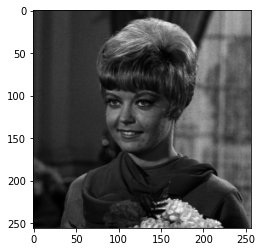

(256, 256)


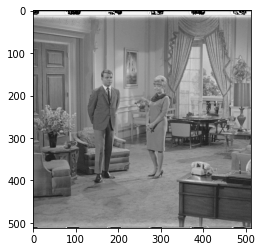

(512, 512)


In [1]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import math
from IPython.display import Image

imgA = cv.imread("../gcPDI2/imgPDI2/female01.tiff",0)
plt.imshow(imgA,"gray")
plt.show()
print(imgA.shape)
imgB = cv.imread("../gcPDI2/imgPDI2/scene.tiff",0)
plt.imshow(imgB,"gray")
plt.show()
print(imgB.shape)

### Filtro Espacial de Smoothing

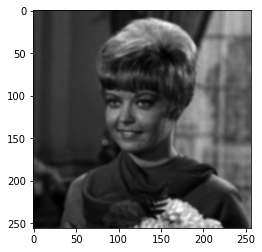

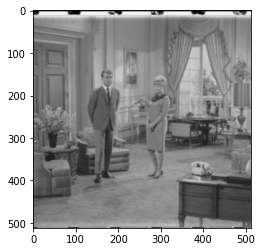

In [2]:
#GaussianBlur
resultASDG = cv.GaussianBlur(imgA,(5,5),0)
plt.imshow(resultASDG,cmap='gray')
plt.show()
resultBSDG = cv.GaussianBlur(imgB,(5,5),0)
plt.imshow(resultBSDG,cmap='gray')
plt.show()

### Filtro Espacial de Sharpening

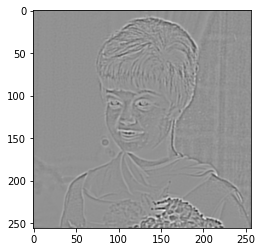

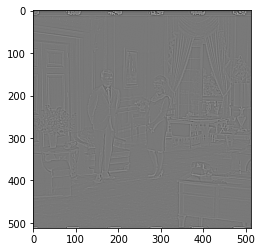

In [3]:
resultASDL = cv.Laplacian(imgA,cv.CV_16S,ksize=5)
plt.imshow(resultASDL,cmap='gray')
plt.show()
resultBSDL = cv.Laplacian(imgB,cv.CV_16S,ksize=5)
plt.imshow(resultBSDL,cmap='gray')
plt.show()

### Filtro na Frequência Passa-Baixa

In [4]:
#Filter: Gaussian
def GaussLP(img, Fsize):
    rows, cols = img.shape
    base = np.zeros((rows, cols))
    centerx, centery = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = math.exp(((-math.hypot(x - centerx, y - centery)**2)/(2*(Fsize**2))))
    return base

#Frequency Domain
def FFLowPass(img, Fsize, mode='DEFAULT'):    
    base = GaussLP(img, Fsize)
    ##This function computes the n-dimensional discrete Fourier Transform
    spectrum = np.fft.fft2(img)
    ##Shift the zero-frequency component to the center of the spectrum.
    centspectrum = np.fft.fftshift(spectrum)   
    ##Apply Filter
    filtercentspectrum = centspectrum*base    
    ##Uncentered
    filterspectrum = np.fft.ifftshift(filtercentspectrum)
    ##Final
    filterimg = np.fft.ifft2(filterspectrum)
    result = np.real(filterimg)
    ##FULL mode: print step-by-step
    if mode == 'FULL':
        plt.imshow(img,cmap='gray')
        plt.title('Imagem Original')
        plt.show()        
        plt.imshow(np.log(1+np.abs(spectrum)),cmap='gray')
        plt.title('Espectro')
        plt.show()       
        plt.imshow(np.log(1+np.abs(centspectrum)),cmap='gray')
        plt.title('Espectro Centralizado')
        plt.show()          
        plt.imshow(base,cmap='gray')
        plt.title('Filtro Utilizado')
        plt.show()
        plt.imshow(np.log(1+np.abs(filtercentspectrum)),cmap='gray')
        plt.title('Espectro Filtrado e Centralizado')
        plt.show()
        plt.imshow(np.log(1+np.abs(filterspectrum)),cmap='gray')
        plt.title('Espectro Filtrado')
        plt.show()
        plt.imshow(result,cmap='gray')
        plt.title('Imagem Filtrada')
        plt.show()        
        
    return result

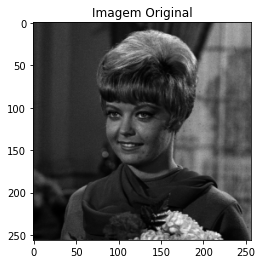

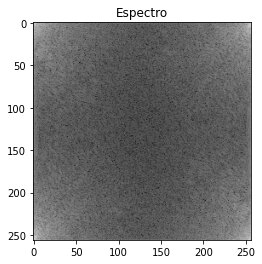

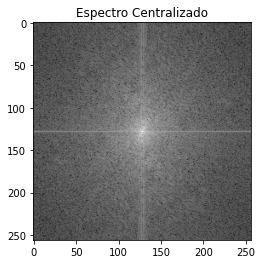

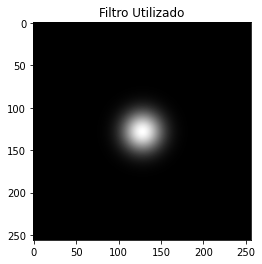

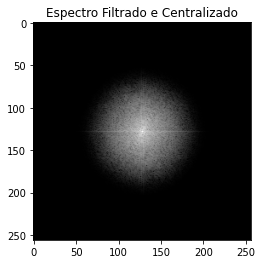

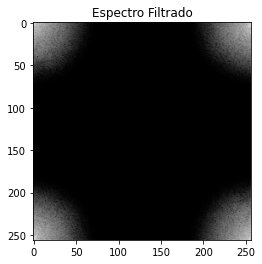

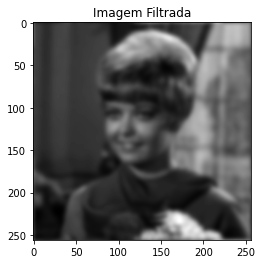

In [5]:
result = FFLowPass(imgA, 16, mode='FULL') #256/16

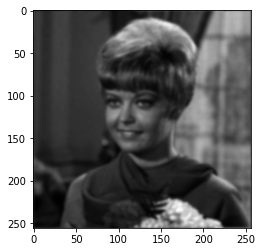

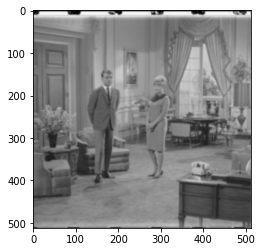

In [6]:
resultAFFLP = FFLowPass(imgA, 32) #256/8
plt.imshow(resultAFFLP,cmap='gray')
plt.show()
resultBFFLP = FFLowPass(imgB, 64) #512/8
plt.imshow(resultBFFLP,cmap='gray')
plt.show()

### Filtro na Frequência Passa-Alta

In [7]:
#Filter: Gaussian
def GaussHP(img, Fsize):
    rows, cols = img.shape
    base = np.zeros((rows, cols))
    centerx, centery = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - math.exp(((-math.hypot(x - centerx, y - centery)**2)/(2*(Fsize**2))))
    return base

#Frequency Domain
def FFHighPass(img, Fsize, mode='DEFAULT'):    
    base = GaussHP(img, Fsize)
    ##This function computes the n-dimensional discrete Fourier Transform
    spectrum = np.fft.fft2(img)
    ##Shift the zero-frequency component to the center of the spectrum.
    centspectrum = np.fft.fftshift(spectrum)   
    ##Apply Filter
    filtercentspectrum = centspectrum*base    
    ##Uncentered
    filterspectrum = np.fft.ifftshift(filtercentspectrum)
    ##Final
    filterimg = np.fft.ifft2(filterspectrum)
    result = np.real(filterimg)
    ##FULL mode: print step-by-step
    if mode == 'FULL':
        plt.imshow(img,cmap='gray')
        plt.title('Imagem Original')
        plt.show()        
        plt.imshow(np.log(1+np.abs(spectrum)),cmap='gray')
        plt.title('Espectro')
        plt.show()       
        plt.imshow(np.log(1+np.abs(centspectrum)),cmap='gray')
        plt.title('Espectro Centralizado')
        plt.show()          
        plt.imshow(base,cmap='gray')
        plt.title('Filtro Utilizado')
        plt.show()
        plt.imshow(np.log(1+np.abs(filtercentspectrum)),cmap='gray')
        plt.title('Espectro Filtrado e Centralizado')
        plt.show()
        plt.imshow(np.log(1+np.abs(filterspectrum)),cmap='gray')
        plt.title('Espectro Filtrado')
        plt.show()
        plt.imshow(result,cmap='gray')
        plt.title('Imagem Filtrada')
        plt.show()        
        
    return result

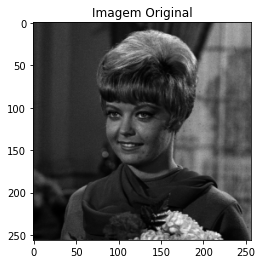

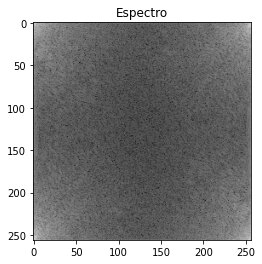

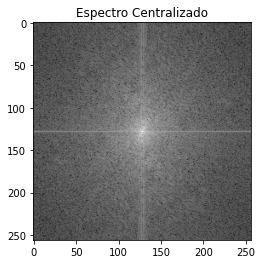

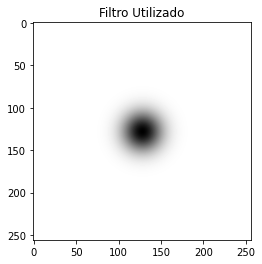

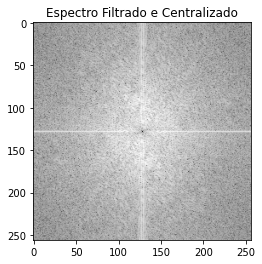

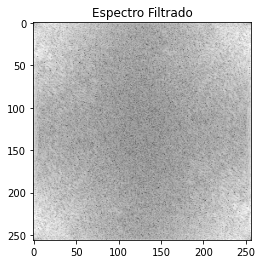

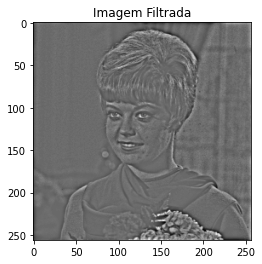

In [8]:
result = FFHighPass(imgA, 16, mode='FULL') #256/16

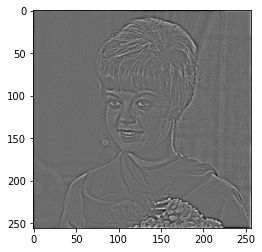

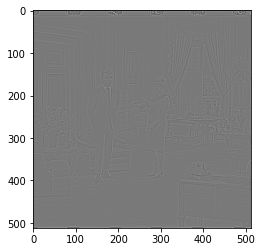

In [9]:
resultAFFHP = FFHighPass(imgA, 32) #256/8
plt.imshow(resultAFFHP,cmap='gray')
plt.show()
resultBFFHP = FFHighPass(imgB, 64) #512/8
plt.imshow(resultBFFHP,cmap='gray')
plt.show()

## Conclusão

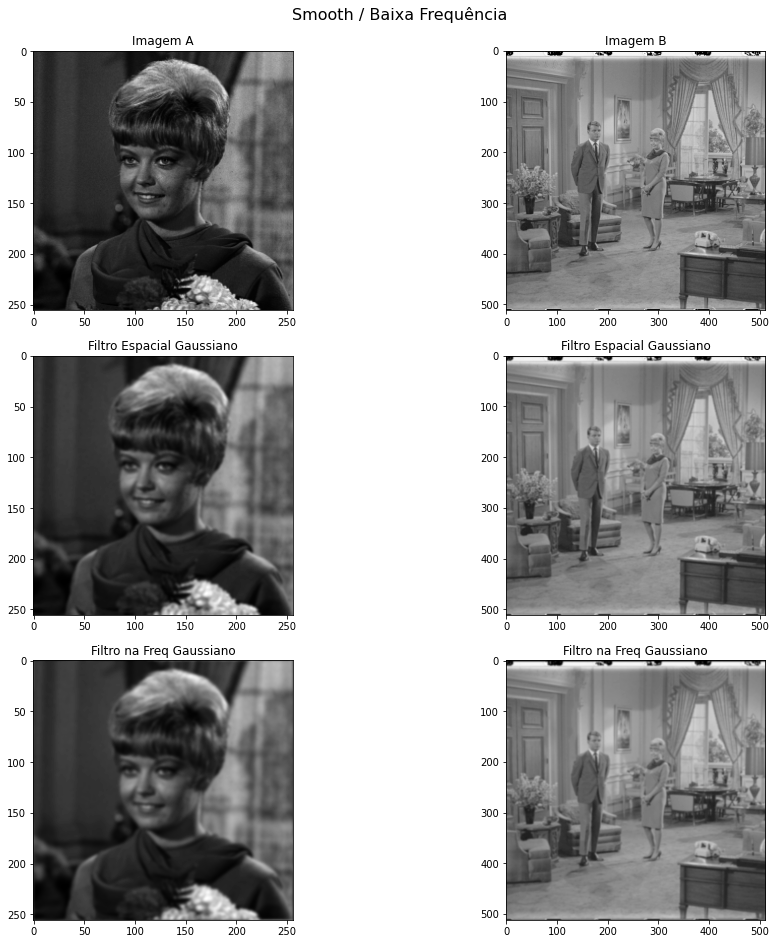

In [10]:
f, axarr = plt.subplots(3, 2, constrained_layout=True)
f.set_figheight(13)
f.set_figwidth(13)
f.suptitle('Smooth / Baixa Frequência', fontsize=16)

axarr[0, 0].imshow(imgA,'gray')
axarr[0, 0].set_title('Imagem A')
axarr[0, 1].imshow(imgB,'gray')
axarr[0, 1].set_title('Imagem B')

axarr[1, 0].imshow(resultASDG,'gray')
axarr[1, 0].set_title('Filtro Espacial Gaussiano')
axarr[1, 1].imshow(resultBSDG,'gray')
axarr[1, 1].set_title('Filtro Espacial Gaussiano')

axarr[2, 0].imshow(resultAFFLP,'gray')
axarr[2, 0].set_title('Filtro na Freq Gaussiano')
axarr[2, 1].imshow(resultBFFLP,'gray')
axarr[2, 1].set_title('Filtro na Freq Gaussiano')
plt.show()

Os resultados para regiões de **baixa-frequência** se mostraram semelhantes, sendo o tamanho da máscara, para o filtro no domínio espacial, ou o raio do filtro, para o filtro no domínio da frequência, o parâmetro a ser modificado, dependendo da necessidade do processamento.

A escolha de se utilizar o processo de filtragem no domínio da frequência pode se dar por permitir escolher tipos de manipulações (círculos, retângulos ou determinadas regiões no espectro), enquanto a filtragem no domínio do espaço é mais simples de ser entendida, e geralmente porque é computacionalmente mais rápido realizar as transformadas de Fourier 2D (*Fast Fourier Transform*) com a multiplicação do filtro do que realizar uma convolução no domínio da imagem (espacial).

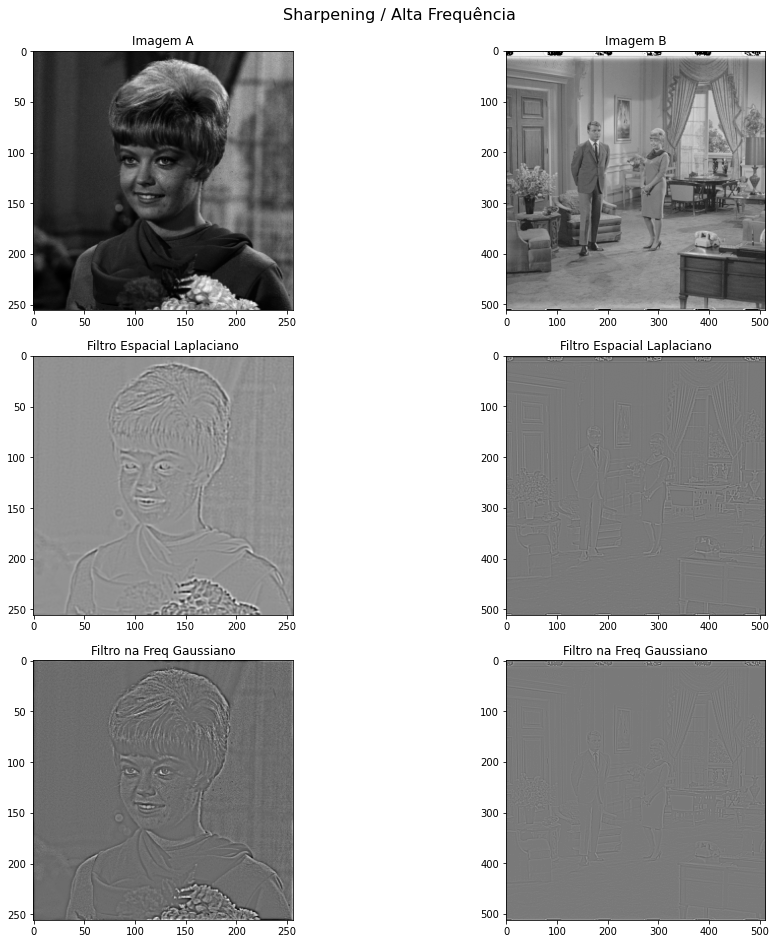

In [11]:
f, axarr = plt.subplots(3, 2, constrained_layout=True)
f.set_figheight(13)
f.set_figwidth(13)
f.suptitle('Sharpening / Alta Frequência', fontsize=16)

axarr[0, 0].imshow(imgA,'gray')
axarr[0, 0].set_title('Imagem A')
axarr[0, 1].imshow(imgB,'gray')
axarr[0, 1].set_title('Imagem B')

axarr[1, 0].imshow(resultASDL,'gray')
axarr[1, 0].set_title('Filtro Espacial Laplaciano')
axarr[1, 1].imshow(resultBSDL,'gray')
axarr[1, 1].set_title('Filtro Espacial Laplaciano')

axarr[2, 0].imshow(resultAFFHP,'gray')
axarr[2, 0].set_title('Filtro na Freq Gaussiano')
axarr[2, 1].imshow(resultBFFHP,'gray')
axarr[2, 1].set_title('Filtro na Freq Gaussiano')
plt.show()

Os resultados para regiões de **alta-frequência** demostram que para a Imagem A o filtro Laplaciano valorizou mais os contornos em si, enquanto o filtro passa-alta agiu segmentando regiões, dando bom contraste a olhos humanos.

Para a imagem B, que apresenta-se com regiões mais claras e uniformes, a escolha do tamanho do kernel e do raio do filtro foram inadequadas, produzindo resultados pouco perceptíveis a olhos humanos.

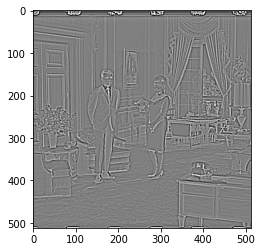

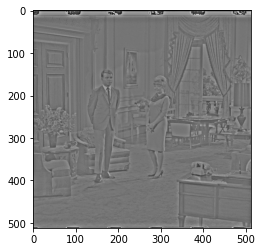

In [12]:
resultBSDL = cv.Laplacian(imgB,cv.CV_16S,ksize=7)
plt.imshow(resultBSDL,cmap='gray')
plt.show()
resultBFFHP = FFHighPass(imgB, 16)
plt.imshow(resultBFFHP,cmap='gray')
plt.show()

Com a mudança dos parâmetros dos filtros, obteve-se melhores resultados. Nesse caso, o filtro laplaciano se mostrou melhor em destacar bordas, enquanto o filtro passa-alta destacou melhor as formas.

## Fontes

https://www.geeksforgeeks.org/spatial-filtering-and-its-types/

https://www.geeksforgeeks.org/frequency-domain-filters-and-its-types/

https://www.tutorialspoint.com/dip/introduction_to_frequency_domain.htm

https://hicraigchen.medium.com/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82